In [1]:
import astropy as ap
import astropy.io.fits as ap_fits
import astropy.modeling as ap_mod
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.optimize as sp_opt
import scipy.stats as sp_stat

import IfA_Smeargle as ifa

In [2]:
fits,header,data = ifa.hotel.open_fits_file("190510_T40K_2hrdark_2.5VdetBias_up_16avg_GN_CDS_ADU_per_ksec.fits")

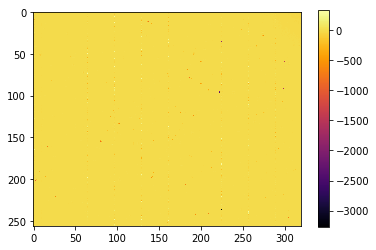

In [3]:
fig, ax = plt.subplots(1, 1)
ifa.hotel.plot_array_heatmap_image(data,figure_axes=ax)

#plt.imshow(data, cmap='hot')
#plt.colorbar()
#plt.show()

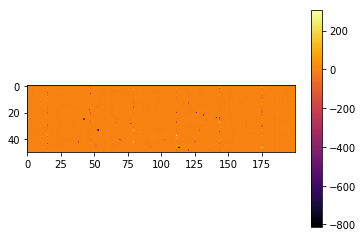

In [5]:
x_bounds = [50,250]
y_bounds = [100,150]

sub_data = ifa.hotel.extract_subarray(data,x_bounds,y_bounds)

fig2, ax2 = plt.subplots(1, 1)
ifa.hotel.plot_array_heatmap_image(sub_data,figure_axes=ax2)

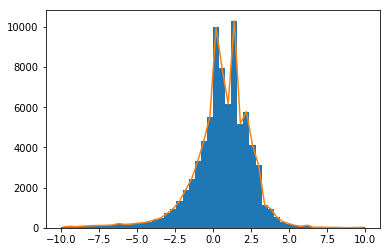

In [6]:
hist_data = plt.hist(data.flatten(),bins=50,range=(-10,10))

# Define the x-axis values, that is, the center of each bar.
hist_x = (hist_data[1][0:-1] + hist_data[1][1:])/2
hist_y = hist_data[0]
plt.plot(hist_x,hist_y)

plt.show()

In [6]:
def gaussian_function(x, a,b,c,d):
    return a * np.exp( -(x-b)**2/(2*c**2) ) + d

In [7]:
"""
TRASH

limit = 1
gauss_x = hist_x#[limit:-limit]
gauss_y = hist_y#[limit:-limit]

guess = [5000, 2, 3, 0.]

gauss_params = sp_opt.curve_fit(gaussian_function,gauss_x,gauss_y,
                                p0=None)
print(gauss_params)

x_test  = np.linspace(-10,10,1000)
plt.plot(x_test,gaussian_function(x_test,*guess))
plt.plot(gauss_x,gauss_y)
plt.plot(gauss_x,gaussian_function(gauss_x,*gauss_params[0]))
"""

'\nTRASH\n\nlimit = 1\ngauss_x = hist_x#[limit:-limit]\ngauss_y = hist_y#[limit:-limit]\n\nguess = [5000, 2, 3, 0.]\n\ngauss_params = sp_opt.curve_fit(gaussian_function,gauss_x,gauss_y,\n                                p0=None)\nprint(gauss_params)\n\nx_test  = np.linspace(-10,10,1000)\nplt.plot(x_test,gaussian_function(x_test,*guess))\nplt.plot(gauss_x,gauss_y)\nplt.plot(gauss_x,gaussian_function(gauss_x,*gauss_params[0]))\n'

{'mean': 0.8468728577975844, 'stddev': 1.4414500274523576, 'amplitude': 8364.998144102832, 'max': 8364.665941391679}


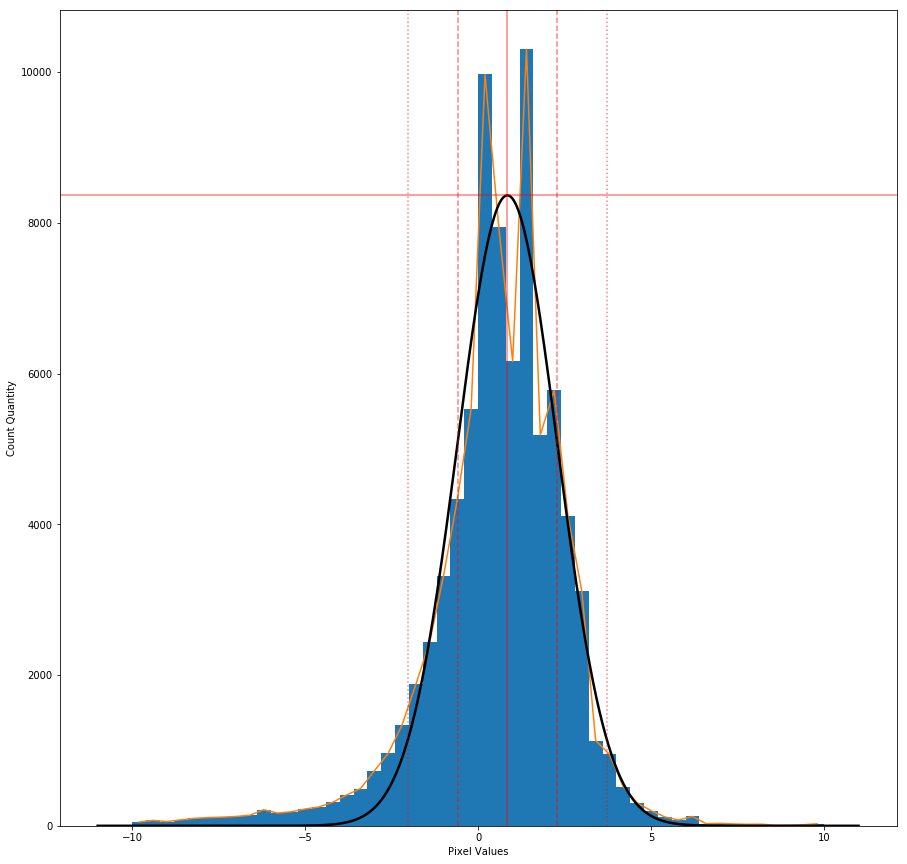

In [9]:
fig2, ax3 = plt.subplots(1, 1,figsize=(15,15))
ax3 = ifa.hotel.plot_array_histogram(data.flatten(),figure_axes=ax3)[1]
print(ax3)

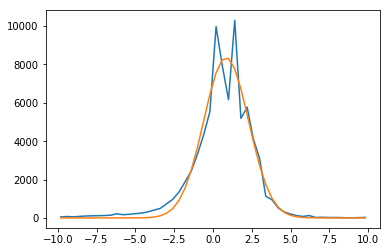

In [20]:
g_init = ap_mod.models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = ap_mod.fitting.LevMarLSQFitter()
g = fit_g(g_init, hist_x, hist_y)

plt.plot(hist_x,hist_y)
plt.plot(hist_x, g(hist_x), label='Gaussian')

<class 'float'>


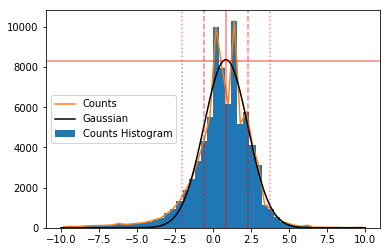

In [50]:
fig, ax = plt.subplots(1, 1)
plot_domain = [-10,10]
hist_data = ax.hist(data.flatten(),bins=50,range=(plot_domain[0],plot_domain[-1]),label='Counts Histogram')


hist_x = (hist_data[1][0:-1] + hist_data[1][1:])/2
hist_y = hist_data[0]
ax.plot(hist_x,hist_y, label='Counts')


gaussian_init = ap_mod.models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
gaussian_fit_model = ap_mod.fitting.LevMarLSQFitter()
gaussian_fit = gaussian_fit_model(gaussian_init, hist_x, hist_y)
gaussian_x = np.linspace(plot_domain[0],plot_domain[-1],hist_x.size * 10)
ax.plot(gaussian_x, gaussian_fit(gaussian_x),color='black', label='Gaussian')


gaussian_max = np.max(gaussian_fit(hist_x))
gaussian_mean = gaussian_fit.mean
gaussian_stddev = gaussian_fit.stddev
gaussian_amplitude = gaussian_fit.amplitude
print(type(float(gaussian_max)))
# Center line and +/- 1 or 2 sigma vertical lines lines.
mean_stddev_lines = gaussian_mean + gaussian_stddev * np.array([-2,-1,0,1,2])
line_patterns = ['dotted','dashed','solid','dashed','dotted']
for linedex, patterndex in zip(mean_stddev_lines, line_patterns):
    ax.axvline(x=linedex,linestyle=patterndex,color='red', alpha=0.5)
# Gaussian peak horizontal lines.
ax.axhline(y=gaussian_max,color='red', alpha=0.5)


ax.legend()
plt.show(fig)